In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
 # Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
 # create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
 # reflect an existing database into a new model
Base=automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
 
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table

Measurement=Base.classes.measurement

Station=Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
 
session=Session(engine)

In [20]:
# Find the most recent date in the data set. 

recent=session.query(Measurement).order_by(Measurement.date.desc())

for record in recent.limit(1).all():
    print(record.date)

2017-08-23


In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
lastTwelve=session.query(Measurement).filter(Measurement.date<='2017-08-03').filter(Measurement.date>='2016-08-23')

# Perform a query to retrieve the data and precipitation scores
prcpList=[]
dateList=[]

for measurement in lastTwelve:
    dateList.append(measurement.date)
    prcpList.append(measurement.prcp)

In [40]:
# Save the query results as a Pandas DataFrame and set the index to the date column

frame={'prcp': prcpList, 'date': dateList}

dates=pd.DataFrame(frame).set_index('date')

# Sort the dataframe by date

dates.sort_values(by=['date'], axis=0)

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.70
...,...
2017-08-02,0.25
2017-08-03,0.01
2017-08-03,0.00


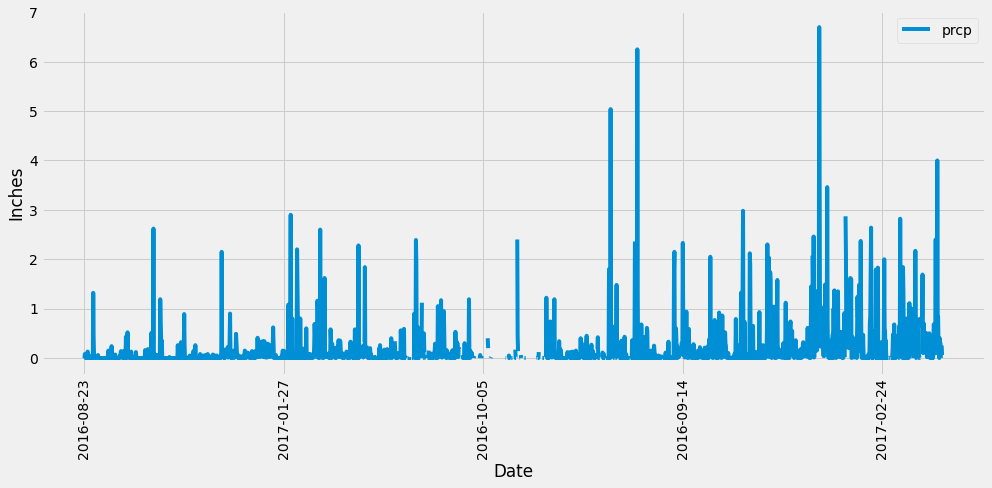

In [61]:
# Use Pandas Plotting with Matplotlib to plot the data

fig=dates.plot(figsize=(14, 7), rot=90)

fig.set_xlabel('Date')

fig.set_ylabel('Inches')

plt.tight_layout()

In [62]:
# Use Pandas to calcualte the summary statistics for the precipitation data

dates.describe()

,prcp
count,1951.000000
mean,0.181246
std,0.468249
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [63]:
# Design a query to calculate the total number stations in the dataset
 
session.query(Station.id).count()

9

In [94]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)

count=func.count(Measurement.station)

# List the stations and the counts in descending order.

session.query(Measurement.station, count).group_by(Measurement.station).order_by(count.desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [118]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest=func.min(Measurement.prcp)
highest=func.max(Measurement.prcp)
av=func.avg(Measurement.prcp)

print(f"Lowest: {session.query(lowest).filter(Measurement.station=='USC00519281').one()}")
print(f"Highest: {session.query(highest).filter(Measurement.station=='USC00519281').one()}")
print(f"Average: {session.query(av).filter(Measurement.station=='USC00519281').one()}")


Lowest: (0.0,)
Highest: (9.64,)
Average: (0.2123520923520915,)


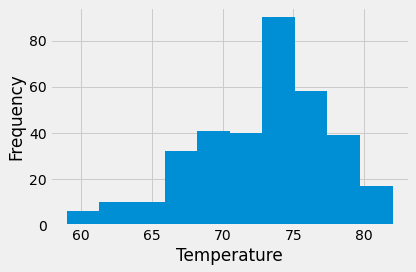

In [127]:
 # Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

lastTwelveStation=session.query(Measurement).filter(Measurement.station=='USC00519281').filter(Measurement.date<='2017-08-03').filter(Measurement.date>='2016-08-23')

tempList=[]

for tob in lastTwelveStation:
    tempList.append(tob.tobs)

plt.hist(tempList)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.tight_layout()
